In [102]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Natural Gas Futures Historical Data.csv')


In [4]:
print(df.head())

           Date  Price   Open   High    Low    Vol. Change %
0  Mar 07, 2022  376.9  388.7  400.3  373.7  61.11K   -0.48%
1  Mar 04, 2022  378.7  365.0  381.7  363.1  70.78K    5.17%
2  Mar 03, 2022  360.1  364.2  374.7  351.7  72.84K    0.67%
3  Mar 02, 2022  357.7  353.6  366.2  351.4  75.20K    3.08%
4  Mar 01, 2022  347.0  341.5  351.4  336.3  47.83K    3.06%


In [49]:
df["Date"] = df["Date"].str.replace(',',"")
df["Date"] = df["Date"].str.replace(' ',"")
df["Date"] = pd.to_datetime(df["Date"],format = "%b%d%Y")



In [61]:
modified = df.loc[:,['Date','Price','Vol.']]

In [62]:
modified

,Date,Price,Vol.
0,2022-03-07,376.9,61.11K
1,2022-03-04,378.7,70.78K
2,2022-03-03,360.1,72.84K
3,2022-03-02,357.7,75.20K
4,2022-03-01,347.0,47.83K
...,...,...,...
2745,2011-12-19,165.5,35.44K
2746,2011-12-17,165.8,1.68K
2747,2011-12-16,165.4,52.03K
2748,2011-12-15,168.9,70.29K


In [51]:
gold=pd.read_csv('/content/drive/MyDrive/BSE-BOM590111.csv')

In [52]:
gold.head()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
0,2017-02-06,0.79,0.79,0.76,0.76,0.79,7430.0,7.0,5848.0,7430.0,100.0,0.03,-0.03
1,2017-02-03,0.79,0.79,0.79,0.79,0.79,310.0,4.0,244.0,310.0,100.0,0.00,0.00
2,2017-02-02,0.83,0.83,0.83,0.83,0.83,75.0,1.0,62.0,75.0,100.0,0.00,0.00
3,2017-01-31,0.87,0.87,0.87,0.87,0.87,1050.0,2.0,913.0,1050.0,100.0,0.00,0.00
4,2017-01-25,0.91,0.91,0.91,0.91,0.91,400.0,1.0,364.0,400.0,100.0,0.00,0.00


In [60]:
gold.tail()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
1655,2009-12-07,65.55,71.00,57.6,65.25,64.071524,42741.0,286.0,2738481.0,14444.0,33.79,13.40,-0.3
1656,2009-12-04,84.95,84.95,66.3,71.95,73.919145,133820.0,430.0,9891860.0,82395.0,61.57,18.65,-13.0
1657,2009-12-03,72.00,72.00,65.2,70.80,71.469977,84551.0,368.0,6042858.0,61676.0,72.95,6.80,-1.2
1658,2009-12-02,60.00,60.00,60.0,60.00,60.000000,250.0,3.0,15000.0,250.0,100.00,0.00,0.0
1659,2009-12-01,36.00,50.00,36.0,50.00,49.767758,30141.0,55.0,1500050.0,29000.0,96.21,14.00,14.0


In [63]:
g_modified = gold.loc[:,['Date','Open']]

In [64]:
g_modified

,Date,Open
0,2017-02-06,0.79
1,2017-02-03,0.79
2,2017-02-02,0.83
3,2017-01-31,0.87
4,2017-01-25,0.91
...,...,...
1655,2009-12-07,65.55
1656,2009-12-04,84.95
1657,2009-12-03,72.00
1658,2009-12-02,60.00


In [68]:
g_modified["Date"] = g_modified["Date"].str.replace('-','')
g_modified["Date"] = pd.to_datetime(g_modified["Date"],format="%Y%m%d")


In [69]:
result = pd.merge(modified,g_modified,on="Date")

In [70]:
result

,Date,Price,Vol.,Open
0,2017-02-06,205.9,58.23K,0.79
1,2017-02-03,206.2,62.36K,0.79
2,2017-02-02,215.4,66.33K,0.83
3,2017-01-31,212.8,53.21K,0.87
4,2017-01-25,225.5,36.43K,0.91
...,...,...,...,...
1147,2011-12-20,164.4,37.73K,8.44
1148,2011-12-19,165.5,35.44K,9.13
1149,2011-12-16,165.4,52.03K,9.30
1150,2011-12-15,168.9,70.29K,9.33


In [71]:
result = result.rename(columns={"Open":"Gold Price"})

In [96]:
result

,Date,Price,Vol.,Gold Price
0,2017-02-06,205.9,58.23K,0.79
1,2017-02-03,206.2,62.36K,0.79
2,2017-02-02,215.4,66.33K,0.83
3,2017-01-31,212.8,53.21K,0.87
4,2017-01-25,225.5,36.43K,0.91
...,...,...,...,...
1147,2011-12-20,164.4,37.73K,8.44
1148,2011-12-19,165.5,35.44K,9.13
1149,2011-12-16,165.4,52.03K,9.30
1150,2011-12-15,168.9,70.29K,9.33


In [101]:
gas_mean = result["Price"].mean()
gold_mean = result["Gold Price"].mean()
gas_dev = result["Price"].std()
gold_dev = result["Gold Price"].std()

prod =(((result["Price"]-gas_mean)/gas_dev)*((result["Gold Price"]-gold_mean)/gold_dev)).sum()
corr = prod/(result.shape[0]-1)
print(corr)

-0.2843755492853089


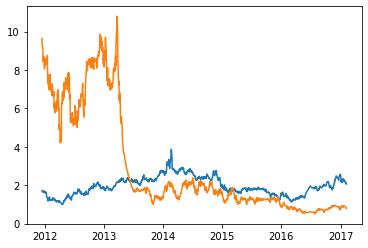

In [109]:

plt.plot(result["Date"],result["Price"]/100)
plt.plot(result["Date"],result["Gold Price"])
plt.show()